# Importing Libraries

In [1]:
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import svm as sksvm
from sklearn.model_selection import train_test_split
%matplotlib inline
# import mpld3 #enabling the zoom options 
# mpld3.enable_notebook()

In [2]:
# To get svmutil & svm, you need to copy python folder and import from inside the folder.
# Note that this is the same library that Scikit Learn uses for SVM. 
# We import here to directly use it, instead of using it through sklearn.
svmpath = os.path.join(os.getcwd(), 'libsvm-3.22/python')
os.chdir(svmpath)
import svmutil
import svm

In [3]:
# change working dir back to the main dir
par1 = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
par2 = os.path.abspath(os.path.join(par1, os.pardir))
os.chdir(par2)

In [4]:
print(dir(svmutil))

['C_SVC', 'EPSILON_SVR', 'LINEAR', 'NU_SVC', 'NU_SVR', 'ONE_CLASS', 'POLY', 'PRECOMPUTED', 'PRINT_STRING_FUN', 'RBF', 'SIGMOID', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'c_double', 'evaluations', 'gen_svm_nodearray', 'libsvm', 'os', 'print_null', 'svm_all', 'svm_load_model', 'svm_model', 'svm_node', 'svm_parameter', 'svm_predict', 'svm_problem', 'svm_read_problem', 'svm_save_model', 'svm_train', 'sys', 'toPyModel']


In [5]:
print(dir(svm))

['ARRAY', 'ArgumentError', 'Array', 'BigEndianStructure', 'CDLL', 'CFUNCTYPE', 'C_SVC', 'DEFAULT_MODE', 'EPSILON_SVR', 'LINEAR', 'LibraryLoader', 'LittleEndianStructure', 'NU_SVC', 'NU_SVR', 'ONE_CLASS', 'POINTER', 'POLY', 'PRECOMPUTED', 'PRINT_STRING_FUN', 'PYFUNCTYPE', 'PyDLL', 'RBF', 'RTLD_GLOBAL', 'RTLD_LOCAL', 'SIGMOID', 'SetPointerType', 'Structure', 'Union', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'addressof', 'alignment', 'byref', 'c_bool', 'c_buffer', 'c_byte', 'c_char', 'c_char_p', 'c_double', 'c_float', 'c_int', 'c_int16', 'c_int32', 'c_int64', 'c_int8', 'c_long', 'c_longdouble', 'c_longlong', 'c_short', 'c_size_t', 'c_ssize_t', 'c_ubyte', 'c_uint', 'c_uint16', 'c_uint32', 'c_uint64', 'c_uint8', 'c_ulong', 'c_ulonglong', 'c_ushort', 'c_void_p', 'c_voidp', 'c_wchar', 'c_wchar_p', 'cast', 'cdll', 'create_string_buffer', 'create_unicode_buffer', 'dirname', 'fillprototype', 'find_library', 'genFields', 

https://github.com/cjlin1/libsvm/tree/master/python

options:
-s svm_type : set type of SVM (default 0)
	0 -- C-SVC
	1 -- nu-SVC
	2 -- one-class SVM
	3 -- epsilon-SVR
	4 -- nu-SVR
-t kernel_type : set type of kernel function (default 2)
	0 -- linear: u'*v
	1 -- polynomial: (gamma*u'*v + coef0)^degree
	2 -- radial basis function: exp(-gamma*|u-v|^2)
	3 -- sigmoid: tanh(gamma*u'*v + coef0)
-d degree : set degree in kernel function (default 3)
-g gamma : set gamma in kernel function (default 1/num_features)
-r coef0 : set coef0 in kernel function (default 0)
-c cost : set the parameter C of C-SVC, epsilon-SVR, and nu-SVR (default 1)
-n nu : set the parameter nu of nu-SVC, one-class SVM, and nu-SVR (default 0.5)
-p epsilon : set the epsilon in loss function of epsilon-SVR (default 0.1)
-m cachesize : set cache memory size in MB (default 100)
-e epsilon : set tolerance of termination criterion (default 0.001)
-h shrinking: whether to use the shrinking heuristics, 0 or 1 (default 1)
-b probability_estimates: whether to train a SVC or SVR model for probability estimates, 0 or 1 (default 0)
-wi weight: set the parameter C of class i to weight*C, for C-SVC (default 1)

The k in the -g option means the number of attributes in the input data.

In [6]:
# reading data 
mat_data = os.path.join(os.getcwd(), 'machine-learning-ex6/ex6/ex6data1.mat')
raw_data = loadmat(mat_data)
X = raw_data['X']
y = raw_data['y'].ravel()

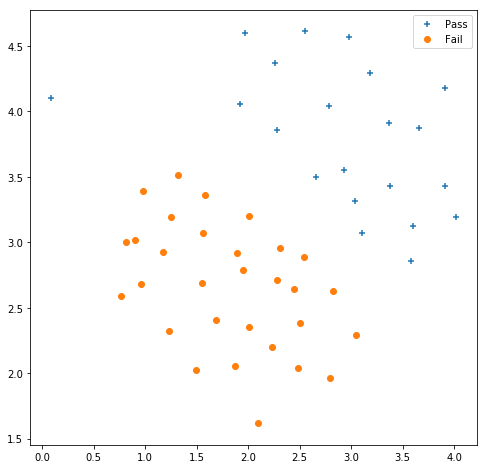

In [7]:
# plottin the data
fig, ax= plt.subplots(figsize=(8,8))

pass_points = np.where(y==1)
fail_points = np.where(y==0)

plt.scatter(X[pass_points,0], X[pass_points,1], marker='+', label='Pass')
plt.scatter(X[fail_points,0], X[fail_points,1], marker='o', label='Fail')
plt.legend()
plt.show()

Plotting decision boundaries:

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.contour.html

http://www.python-course.eu/matplotlib_contour_plot.php

# LibSVM 
In this part we use LibSVM package directly to find decision boundary.

Look into svmutil.py for more details. 

https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

In [8]:
prob = svmutil.svm_problem(y.tolist(), X.tolist())
params1 = svmutil.svm_parameter('-t 0 -c 1.0') # c=1 corresponds to high regularization. Forgets outliers
params2 = svmutil.svm_parameter('-t 0 -c 100.0') # c=100 has very low regularization. Is prone to over-ffiting
m1 = svmutil.svm_train(prob, params1)
m2 = svmutil.svm_train(prob, params2)

In [9]:
xx, yy = np.meshgrid(np.linspace(0, 4, 500),
                     np.linspace(1, 5, 500))

X_estimate = np.c_[xx.ravel(), yy.ravel()]
y_estimate = np.zeros(X_estimate.shape[0]) # This is just to give something to the svm_predict. not important in drawing the decision boundary
p_label, p_acc, p_val1 = svmutil.svm_predict(y_estimate.tolist(),
                                            X_estimate.tolist(), m1, '-b 0')
p_label, p_acc, p_val2 = svmutil.svm_predict(y_estimate.tolist(),
                                            X_estimate.tolist(), m2, '-b 0')
print('!!! Forget these accuracy calculations. These are indicative of nothing !!!')

Accuracy = 63.2424% (158106/250000) (classification)
Accuracy = 58.576% (146440/250000) (classification)
!!! Forget these accuracy calculations. These are indicative of nothing !!!


#### Decision Boundary Plots

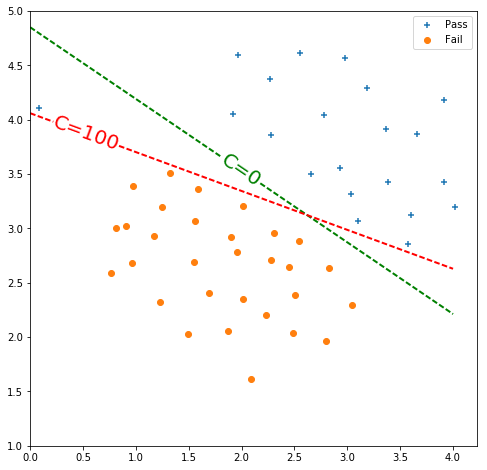

In [10]:
fig, ax= plt.subplots(figsize=(8,8))

plt.scatter(X[pass_points,0], X[pass_points,1], marker='+', label='Pass')
plt.scatter(X[fail_points,0], X[fail_points,1], marker='o', label='Fail')
plt.legend()

Z1 = np.array(p_val1)
Z1 = Z1.reshape(xx.shape)
Z2 = np.array(p_val2)
Z2 = Z2.reshape(xx.shape)

cp1 = plt.contour(xx, yy, Z1,  linewidths=2, linestyles='dashed', levels=[0], colors='green')
plt.clabel(cp1, inline=True, fontsize=20, fmt={0:'C=0'})

cp2 = plt.contour(xx, yy, Z2,  linewidths=2, linestyles='dashed', levels=[0], colors='red')
plt.clabel(cp2, inline=True, fontsize=20, fmt={0:'C=100'})

plt.show()

# Non-linear classification with RBF Kernel

In [11]:
mat_data = os.path.join(os.getcwd(), 'machine-learning-ex6/ex6/ex6data2.mat')
raw_data = loadmat(mat_data)
X = raw_data['X']
y = raw_data['y'].ravel()

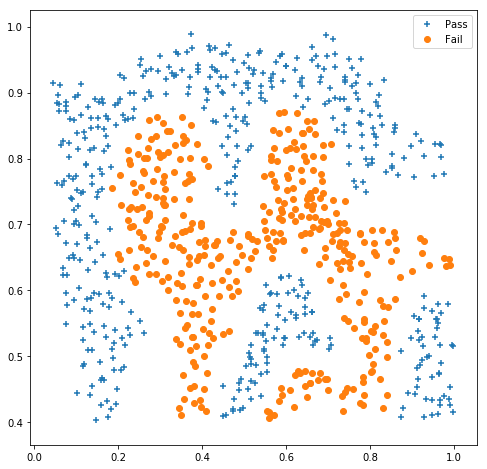

In [12]:
fig, ax= plt.subplots(figsize=(8,8))

pass_points = np.where(y==1)
fail_points = np.where(y==0)

plt.scatter(X[pass_points,0], X[pass_points,1], marker='+', label='Pass')
plt.scatter(X[fail_points,0], X[fail_points,1], marker='o', label='Fail')
plt.legend()
plt.show()

In [13]:
# since our data is now much bigger size, and we are going to use a non-linear classification,
# let's break down the data to train and cross-validation set

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)

In [14]:
# it's very important to normalize the data before any classification. 
# the data are biased. One set is [0-1], while other is [0.4-1]. So, normalizing the data is necessary.

def normalize_features(features):
    mu = np.average(features, axis=0)
    std = np.std(features, axis=0)
    features_ = (features-mu)/std
    
    return mu, std, features_

In [15]:
# We have to save average and standard deviation, or any other parameters that we use to normalize our data.
# Any other future sets, test or cv, that are being tested have to be normalized with these values before 
# feeding to the model.
mu_, std_, X_train_normal = normalize_features(X_train)

### Grid search for the best (C, $\gamma$) pair
c is more or less indication of regularization 

$\gamma$ shows how fast we jump to zero as we go further away from each landmark in rbf calculations. The higher the value the faster we drop. This means sharper points and allows for catching all outliers.

In [ ]:
C = [1e-4, 1e-2, 1, 2, 5, 10, 100, 1000]
gamma = [1e-4, 1e-2, 1, 2, 5, 10, 100, 1000]
c_p, g_p = np.meshgrid(C, gamma)
mesh_c_g = np.c_[c_p.ravel(), g_p.ravel()].tolist()

prob = svmutil.svm_problem(y_train.tolist(), X_train_normal.tolist())
train_errors = []

# Normalized cross-validation dataset 
X_cv_normal = (X_cv-mu_)/std_
cv_errors = []

for mesh in mesh_c_g:
    
    params1 = svmutil.svm_parameter('-t 2 -c {} -g {}'.format(mesh[0], mesh[1]))
    m = svmutil.svm_train(prob, params1)
    
    # populating training error
    _, t_error, _ = svmutil.svm_predict(y_train.tolist(), X_train_normal.tolist(), m)
    train_errors.append(t_error[0])
    
    # populating CV error
    _, cv_error, _ = svmutil.svm_predict(y_cv.tolist(), X_cv_normal.tolist(), m)
    cv_errors.append(cv_error[0])
    


Plotting training & CV accuracy vs. c & $\gamma$

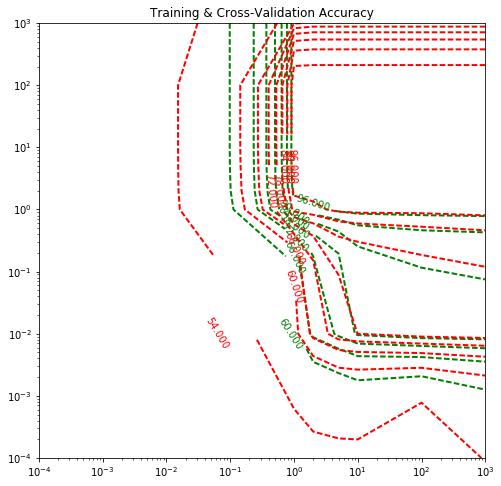

In [17]:
# mpld3.disable_notebook()
# plot training error and CV error vs. c,gamma parameters

fig, ax= plt.subplots(figsize=(8,8))
ax.set_xscale("log")
ax.set_yscale("log") 

Z1 = np.array(train_errors)
Z1 = Z1.reshape(c_p.shape)

Z2 = np.array(cv_errors)
Z2 = Z2.reshape(c_p.shape)


cp1 = plt.contour(c_p, g_p, Z1,  linewidths=2, linestyles='dashed', colors='green')
plt.clabel(cp1, inline=True)

cp2 = plt.contour(c_p, g_p, Z2,  linewidths=2, linestyles='dashed', colors='red')
plt.clabel(cp2, inline=True)
plt.title('Training & Cross-Validation Accuracy')
plt.show()


from the graph above it looks a 96% accuracy is achieved in the range of 1-10 for both parameters. So, let's plot in  this range

In [ ]:
C = [1, 2, 5, 7, 8, 10]
gamma = [1, 2, 5, 7, 8, 10]
c_p, g_p = np.meshgrid(C, gamma)
mesh_c_g = np.c_[c_p.ravel(), g_p.ravel()].tolist()

prob = svmutil.svm_problem(y_train.tolist(), X_train_normal.tolist())
train_errors = []

X_cv_normal = (X_cv-mu_)/std_
cv_errors = []

for mesh in mesh_c_g:
    
    params1 = svmutil.svm_parameter('-t 2 -c {} -g {}'.format(mesh[0], mesh[1]))
    m = svmutil.svm_train(prob, params1)
    
    _, t_error, _ = svmutil.svm_predict(y_train.tolist(), X_train_normal.tolist(), m)
    train_errors.append(t_error[0])
    
    _, cv_error, _ = svmutil.svm_predict(y_cv.tolist(), X_cv_normal.tolist(), m)
    cv_errors.append(cv_error[0])
    

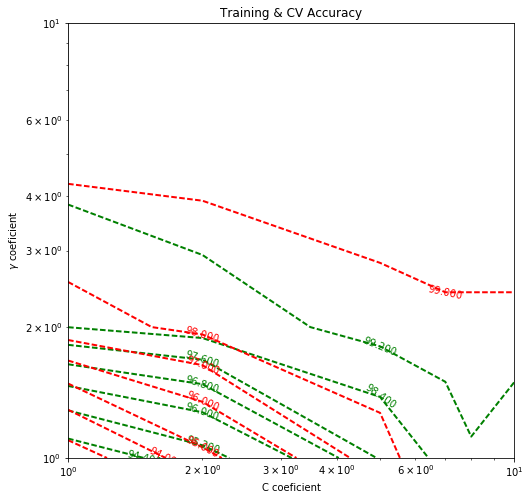

In [19]:
# mpld3.enable_notebook()
# plot training error and CV error vs. c,gamma parameters

fig, ax= plt.subplots(figsize=(8,8))
ax.set_xscale("log")
ax.set_yscale("log") 

Z1 = np.array(train_errors)
Z1 = Z1.reshape(c_p.shape)

Z2 = np.array(cv_errors)
Z2 = Z2.reshape(c_p.shape)


cp1 = plt.contour(c_p, g_p, Z1,  linewidths=2, linestyles='dashed', colors='green')
plt.clabel(cp1, inline=False)

cp2 = plt.contour(c_p, g_p, Z2,  linewidths=2, linestyles='dashed', colors='red')
plt.clabel(cp2, inline=False)

plt.title('Training & CV Accuracy')
plt.xlabel('C coeficient')
plt.ylabel('$\gamma$ coeficient')

plt.grid(True)

plt.show()

It's important to choose parameters based on the highest accuracy on the cross-validation data. 

By looking in this graph, following parameters are selected:

c = 10, $\gamma$ =7.5

In [20]:
C = 10
gamma = 7.5

prob = svmutil.svm_problem(y_train.tolist(), X_train_normal.tolist())
params = svmutil.svm_parameter('-t 2 -c {} -g {}'.format(C, gamma))

m = svmutil.svm_train(prob, params)

_, t_error, _ = svmutil.svm_predict(y_train.tolist(), X_train_normal.tolist(), m)
print('Training Accuracy is: {}'.format(t_error[0]))

_, cv_error, _ = svmutil.svm_predict(y_cv.tolist(), X_cv_normal.tolist(), m)
print('Cross-Validation Accuracy is: {}'.format(cv_error[0]))

Accuracy = 99.8551% (689/690) (classification)
Training Accuracy is: 99.85507246376811
Accuracy = 100% (173/173) (classification)
Cross-Validation Accuracy is: 100.0


In [21]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 500),
                     np.linspace(-2, 2, 500))

X_estimate = np.c_[xx.ravel(), yy.ravel()]
y_estimate = np.zeros(X_estimate.shape[0]) # this is just to give something to the svm_predict. not important in drawing the decision boundary
print('This accuracy is not important, just against all zeros')
p_label, p_acc, p_val1 = svmutil.svm_predict(y_estimate.tolist(), X_estimate.tolist(), m)

This accuracy is not important, just against all zeros
Accuracy = 37.7324% (94331/250000) (classification)


Let's plot decision boundary on the training data:

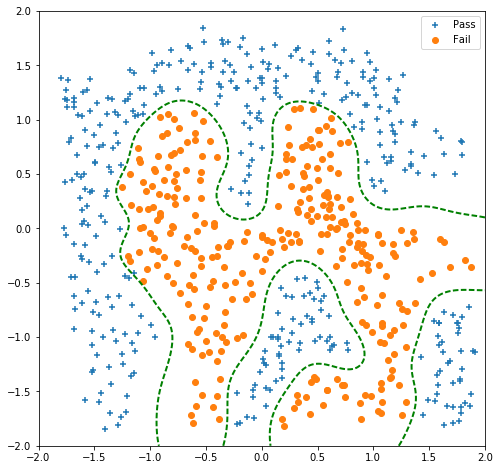

In [22]:
pass_points = np.where(y_train==1)
fail_points = np.where(y_train==0)

fig, ax= plt.subplots(figsize=(8,8))

plt.scatter(X_train_normal[pass_points,0], X_train_normal[pass_points,1], marker='+', label='Pass')
plt.scatter(X_train_normal[fail_points,0], X_train_normal[fail_points,1], marker='o', label='Fail')
plt.legend()

Z1 = np.array(p_val1)
Z1 = Z1.reshape(xx.shape)

cp1 = plt.contour(xx, yy, Z1,  linewidths=2, linestyles='dashed', levels=[0], colors='green')
#plt.clabel(cp1, inline=True, fontsize=20, fmt={0:'C=0'})


plt.show()

# Spam classification
The CleanEmail module is where all the "a" tags, emails, and $ signs are removed and counted.

In [10]:
import pandas as pd
import CleanEmail as clm
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

In [11]:
test = """
> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big.. 
To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com
"""

raw_text = clm.CleanBody(test)
clean_text = raw_text.remove_all_tags()
print('clean text:')
print(clean_text)

number of <a> tags before starting to remove the tags is: 1
number of $ signs before starting to remove them is: 1
number of emails before starting to remove them is: 1
clean text:
Anyone knows how much it costs to host a web portal     Well  it depends on how many visitors you re expecting  This can be anywhere from less than number bucks a month to a couple of dollarnumb   You should checkout httpaddr or perhaps Amazon ECnumber  if youre running something big    To unsubscribe yourself from this mailing list  send an email to  emailaddr 


In [12]:
# stemming all the words in clean_text.
# this is to acount universe, university, and universal as one word of "univers"
words = word_tokenize(clean_text)
stem_list = []
for w in words:
    stem_list.append(ps.stem(w))

In [13]:
# vocab-file is a 1899 array of most common words used in spams. Every email will be compared
# against this list to see which of these words exists in the email body.
vocab_file = os.path.join(os.getcwd(), 'machine-learning-ex6/ex6/vocab.txt')
columns = ['id', 'word']
all_vocab_pd = pd.read_csv(vocab_file, sep='\t', names=columns)

In [14]:
word_indices = []
for eword in stem_list:
    f = all_vocab_pd[all_vocab_pd['word'] == eword]['id'].values 
    if f:
        word_indices.append(f[0])

print(word_indices)

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1893, 1364, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


In [15]:
X_test = np.zeros(all_vocab_pd['word'].size)
X_test [word_indices] = 1
print('Number of non-zero elements:')
np.where(X_test==1)[0].shape[0]

Number of non-zero elements:


45

#### Reading a dataset of preprocessed emails for training. The dataset contains 4000 rows of processed emails

In [4]:
# reading data 
mat_data = os.path.join(os.getcwd(), 'machine-learning-ex6/ex6/spamTrain.mat')
raw_data = loadmat(mat_data)
X = raw_data['X']
y = raw_data['y'].ravel()

In [5]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)

In [47]:
C = [0.6,0.8, 1, 2, 5, 10]
gamma = [1e-2, 0.04, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 2, 5, 10]
c_p, g_p = np.meshgrid(C, gamma)
mesh_c_g = np.c_[c_p.ravel(), g_p.ravel()].tolist()

prob = svmutil.svm_problem(y_train.tolist(), X_train.tolist())
train_errors = []

# Normalized cross-validation dataset 
cv_errors = []

for mesh in mesh_c_g:
    
    print(mesh)
    params1 = svmutil.svm_parameter('-t 2 -c {} -g {}'.format(mesh[0], mesh[1]))
    m = svmutil.svm_train(prob, params1)
    
    # populating training error
    _, t_error, _ = svmutil.svm_predict(y_train.tolist(), X_train.tolist(), m)
    train_errors.append(t_error[0])
    
    # populating CV error
    _, cv_error, _ = svmutil.svm_predict(y_cv.tolist(), X_cv.tolist(), m)
    cv_errors.append(cv_error[0])


[0.6, 0.01]
Accuracy = 98.5625% (3154/3200) (classification)
Accuracy = 97.25% (778/800) (classification)
[0.8, 0.01]
Accuracy = 98.9688% (3167/3200) (classification)
Accuracy = 97.375% (779/800) (classification)
[1.0, 0.01]
Accuracy = 99.3438% (3179/3200) (classification)
Accuracy = 97.5% (780/800) (classification)
[2.0, 0.01]
Accuracy = 99.7812% (3193/3200) (classification)
Accuracy = 97.875% (783/800) (classification)
[5.0, 0.01]
Accuracy = 99.9062% (3197/3200) (classification)
Accuracy = 97.875% (783/800) (classification)
[10.0, 0.01]
Accuracy = 99.9375% (3198/3200) (classification)
Accuracy = 97.875% (783/800) (classification)
[0.6, 0.04]
Accuracy = 99.875% (3196/3200) (classification)
Accuracy = 89% (712/800) (classification)
[0.8, 0.04]
Accuracy = 99.9062% (3197/3200) (classification)
Accuracy = 90.5% (724/800) (classification)
[1.0, 0.04]
Accuracy = 99.9062% (3197/3200) (classification)
Accuracy = 91% (728/800) (classification)
[2.0, 0.04]
Accuracy = 99.9062% (3197/3200) (class

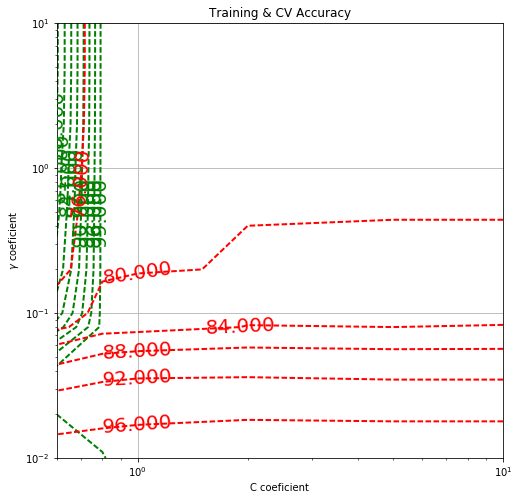

In [49]:
fig, ax= plt.subplots(figsize=(8,8))
ax.set_xscale("log")
ax.set_yscale("log") 

Z1 = np.array(train_errors)
Z1 = Z1.reshape(c_p.shape)

Z2 = np.array(cv_errors)
Z2 = Z2.reshape(c_p.shape)


cp1 = plt.contour(c_p, g_p, Z1,  linewidths=2, linestyles='dashed', colors='green')
plt.clabel(cp1, inline=False, fontsize=20)

cp2 = plt.contour(c_p, g_p, Z2,  linewidths=2, linestyles='dashed', colors='red')
plt.clabel(cp2, inline=False, fontsize=20)

plt.title('Training & CV Accuracy')
plt.xlabel('C coeficient')
plt.ylabel('$\gamma$ coeficient')

plt.grid(True)
plt.show()

In [6]:
# optimum values are selected for C and \lambda as follows:
C = 10
gamma = 0.01

prob = svmutil.svm_problem(y_train.tolist(), X_train.tolist())
params = svmutil.svm_parameter('-t 2 -c {} -g {}'.format(C, gamma))

m = svmutil.svm_train(prob, params)

_, t_error, _ = svmutil.svm_predict(y_train.tolist(), X_train.tolist(), m)
print('Training Accuracy is: {}'.format(t_error[0]))

_, cv_error, _ = svmutil.svm_predict(y_cv.tolist(), X_cv.tolist(), m)
print('Cross-Validation Accuracy is: {}'.format(cv_error[0]))

Accuracy = 99.9688% (3199/3200) (classification)
Training Accuracy is: 99.96875
Accuracy = 97.5% (780/800) (classification)
Cross-Validation Accuracy is: 97.5


#### Evaluate if our test email is clssified as spam or non-spam. We know that this particulr example is not spam so we give [0] to the predictor to compare

In [18]:
X_test = np.reshape(X_test, [1, X_test.shape[0]])
p_value, _, _ = svmutil.svm_predict([0], X_test.tolist(), m)

Accuracy = 100% (1/1) (classification)


### Test on other example

In [24]:
email2 = """
Folks,
 
my first time posting - have a bit of Unix experience, but am new to Linux.

 
Just got a new PC at home - Dell box with Windows XP. Added a second hard disk
for Linux. Partitioned the disk and have installed Suse 7.2 from CD, which went
fine except it didn't pick up my monitor.
 
I have a Dell branded E151FPp 15" LCD flat panel monitor and a nVidia GeForce4
Ti4200 video card, both of which are probably too new to feature in Suse's default
set. I downloaded a driver from the nVidia website and installed it using RPM.
Then I ran Sax2 (as was recommended in some postings I found on the net), but
it still doesn't feature my video card in the available list. What next?
 
Another problem. I have a Dell branded keyboard and if I hit Caps-Lock twice,
the whole machine crashes (in Linux, not Windows) - even the on/off switch is
inactive, leaving me to reach for the power cable instead.
 
If anyone can help me in any way with these probs., I'd be really grateful -
I've searched the 'net but have run out of ideas.
 
Or should I be going for a different version of Linux such as RedHat? Opinions
welcome.
 
Thanks a lot,
Peter

-- 
Irish Linux Users' Group: ilug@linux.ie
http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.
List maintainer: listmaster@linux.ie
"""

raw_text = clm.CleanBody(email2)
clean_text = raw_text.remove_all_tags()
#print('clean text:')
#print(clean_text)

words = word_tokenize(clean_text)
stem_list = []
for w in words:
    stem_list.append(ps.stem(w))

word_indices = []
for eword in stem_list:
    f = all_vocab_pd[all_vocab_pd['word'] == eword]['id'].values 
    if f:
        word_indices.append(f[0])

#print(word_indices)

X_test = np.zeros(all_vocab_pd['word'].size)
X_test [word_indices] = 1


X_test = np.reshape(X_test, [1, X_test.shape[0]])
p_value, _, _ = svmutil.svm_predict([0], X_test.tolist(), m)


if p_value[0]:
    print('We predicted that this is a spam')
else:
    print('We predicted that this is not a spam')


number of <a> tags before starting to remove the tags is: 1
number of $ signs before starting to remove them is: 0
number of emails before starting to remove them is: 2
Accuracy = 100% (1/1) (classification)
We predicted that this is not a spam


### Test on a real spam

In [26]:
email2 = """
Best Buy Viagra Generic Online

Viagra 100mg x 60 Pills $125, Free Pills & Reorder Discount, Top Selling 100% Quality & Satisfaction guaranteed!

We accept VISA, Master & E-Check Payments, 90000+ Satisfied Customers!
http://medphysitcstech.ru
"""

raw_text = clm.CleanBody(email2)
clean_text = raw_text.remove_all_tags()
#print('clean text:')
#print(clean_text)

words = word_tokenize(clean_text)
stem_list = []
for w in words:
    stem_list.append(ps.stem(w))

word_indices = []
for eword in stem_list:
    f = all_vocab_pd[all_vocab_pd['word'] == eword]['id'].values 
    if f:
        word_indices.append(f[0])

#print(word_indices)

X_test = np.zeros(all_vocab_pd['word'].size)
X_test [word_indices] = 1


X_test = np.reshape(X_test, [1, X_test.shape[0]])
p_value, _, _ = svmutil.svm_predict([1], X_test.tolist(), m)


if p_value[0]:
    print('We predicted that this is a spam')
else:
    print('We predicted that this is not a spam')


number of <a> tags before starting to remove the tags is: 1
number of $ signs before starting to remove them is: 1
number of emails before starting to remove them is: 0
Accuracy = 100% (1/1) (classification)
We predicted that this is a spam
